This notebook is used to recreate the deterministic plots made by Chris in the same style as my ones.

The figure replicated here is currently Figure 2 in the bftt paper

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter
import math
import numpy as np
import os.path
from itertools import cycle
import string
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as pe

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [148]:
# data used for figure 2a
solid_curve_data_2a = pd.read_csv('chris_deterministic_figure/Fig2a_SolidCurve_correctScaling.dat', delimiter=' ', header=None, names=['rdetK/rim', 'Nfp'], comment='#')
dashed_curve_data_2a = pd.read_csv('chris_deterministic_figure/Fig2a_DashedCurve_correctScaling.dat', delimiter=' ', header=None, names=['rdetK/rim', 'Nfp'], comment='#')
dots_data_2a = pd.read_csv('chris_deterministic_figure/Fig2a_points_correctScaling.dat', sep=r"\s+", engine='python', names=['rdetK/rim', 'N*/K', 'colour'], header=None, comment='#')

# data for figure 2b
blue_triangle_data_2b = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/solved_full_rm0.1_rd0.6_ri0.8.dat', header=None, sep=r"\s+")
blue_circle_data_2b = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/solved_full_rm0.8_rd0.6_ri0.8.dat', header=None, sep=r"\s+")
orange_triangle_data_2b = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/solved_full_rm0.1_rd1.1_ri0.8.dat', header=None, sep=r"\s+")
orange_circle_data_2b = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/solved_full_rm0.8_rd1.1_ri0.8.dat', header=None, sep=r"\s+")

# data for figure 2c
purple_lines_data_2c = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd0.4_ri0.8_ns1.17.dat', header=None, sep=r"\s+")
purple_dots_data_2c = purple_lines_data_2c[(purple_lines_data_2b[0] > 0.1) & (purple_lines_data_2b[1] < 0.00129)] # get the points where new microhabs added
green_lines_data_2c = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd0.5_ri0.8_ns1.17.dat', header=None, sep=r"\s+")
green_dots_data_2c = green_lines_data_2c[(green_lines_data_2c[0] > 0.1) & (green_lines_data_2c[1] < 0.002)]
blue_lines_data_2c = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd0.6_ri0.8_ns1.17.dat', header=None, sep=r"\s+")

# data for figure 2d
orange_lines_data_2d = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd1.1_ri0.8_ns0.8.dat', header=None, sep=r"\s+")
orange_dots_data_2d = orange_lines_data_2d[(orange_lines_data_2d[0] > 0.1) & (orange_lines_data_2d[1] < 0.0012)]
red_lines_data_2d = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd1.3_ri0.8_ns0.8.dat', header=None, sep=r"\s+")

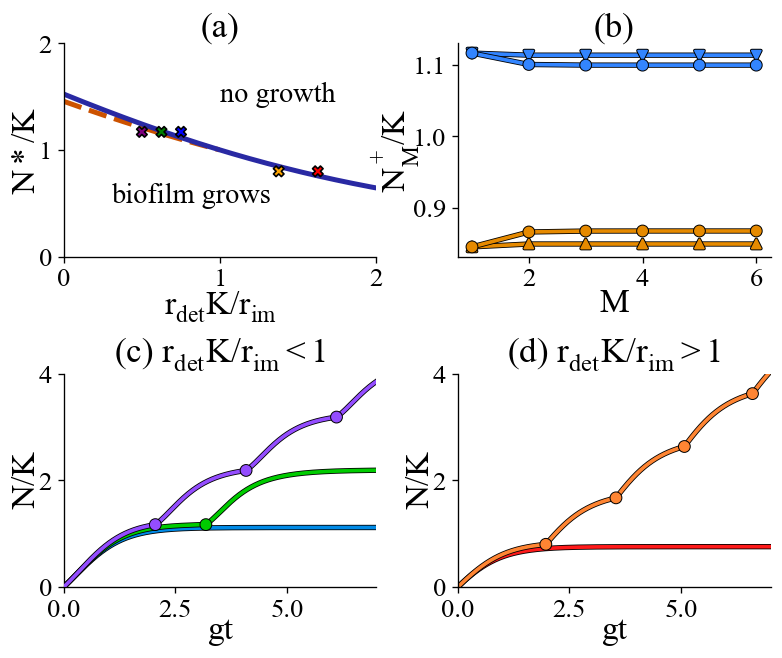

In [174]:
fig, axarr = plt.subplots(2, 2, dpi=120)
fig.set_size_inches(7.6, 6)
plt.subplots_adjust(wspace=0.26, hspace=0.55)

labelsize=20
titlesize=21

line_width=2.2

axarr = axarr.flatten()

for ax in axarr:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=16)

# FIGURE 2A
axarr[0].plot(solid_curve_data_2a['rdetK/rim'], solid_curve_data_2a['Nfp'], lw=3., zorder=0, c='#2929a3')
axarr[0].plot(dashed_curve_data_2a['rdetK/rim'], dashed_curve_data_2a['Nfp'], lw=3., ls='--', zorder=-10, c='#cc5200')
axarr[0].scatter(dots_data_2a['rdetK/rim'], dots_data_2a['N*/K'], color=dots_data_2a['colour'], edgecolor='k', s=40, zorder=100, marker='X')
axarr[0].text(1., 1.45, 'no growth', fontsize=17)
axarr[0].text(0.3, 0.5, 'biofilm grows', fontsize=17)
axarr[0].set_xlabel('$r_{det}K/r_{im}$', fontsize=labelsize, labelpad=-2)
axarr[0].set_ylabel('$N*/K$', fontsize=labelsize, labelpad=-2)
axarr[0].set_title('(a)', fontsize=titlesize, pad=-2)
axarr[0].set_xlim(0, 2)
axarr[0].set_ylim(0, 2)


# FIGURE 2B
m_size = 5
axarr[1].plot(blue_triangle_data_2b[0], blue_triangle_data_2b[1], color='#3385ff', lw=line_width, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()], zorder=0)
axarr[1].scatter(blue_triangle_data_2b[0], blue_triangle_data_2b[1], marker='v', color='#3385ff', s=30, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()], zorder=1)
axarr[1].plot(blue_circle_data_2b[0], blue_circle_data_2b[1], color='#3385ff', lw=line_width, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()], zorder=10)
axarr[1].scatter(blue_circle_data_2b[0], blue_circle_data_2b[1], marker='o', color='#3385ff', s=30, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()], zorder=11)
axarr[1].plot(orange_triangle_data_2b[0], orange_triangle_data_2b[1], color='#e68a00', lw=line_width, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()], zorder=20)
axarr[1].scatter(orange_triangle_data_2b[0], orange_triangle_data_2b[1], marker='^', color='#e68a00', s=30, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()], zorder=21)
axarr[1].plot(orange_circle_data_2b[0], orange_circle_data_2b[1], color='#e68a00', lw=line_width, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()], zorder=30)
axarr[1].scatter(orange_circle_data_2b[0], orange_circle_data_2b[1], marker='o', color='#e68a00', s=30, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()], zorder=31)
axarr[1].set_title('(b)', fontsize=titlesize, pad=-2)
axarr[1].set_xlabel('$M$', fontsize=labelsize, labelpad=-2)
axarr[1].set_ylabel('$N^+_M/K$', fontsize=labelsize, labelpad=-6)

# FIGURE 2C
axarr[2].plot(purple_lines_data_2c[0], purple_lines_data_2c[2], lw=line_width, color='#944dff', zorder=10, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[2].scatter(purple_dots_data_2c[0], purple_dots_data_2c[2], s=30, marker='o', color='#944dff', zorder=11, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()])
axarr[2].plot(green_lines_data_2c[0], green_lines_data_2c[2], lw=line_width, color='#00cc00', zorder=0, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[2].scatter(green_dots_data_2c[0], green_dots_data_2c[2], s=30, marker='o', color='#00cc00', zorder=1, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()])
axarr[2].plot(blue_lines_data_2c[0], blue_lines_data_2c[2], lw=line_width, color='#008ae6', zorder=-9, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[2].set_title('(c) $r_{det}K/r_{im} < 1$', fontsize=titlesize, pad=-2)
axarr[2].set_xlabel('gt', fontsize=labelsize, labelpad=-4)
axarr[2].set_ylabel('N/K', fontsize=labelsize, labelpad=-2)
axarr[2].set_ylim(0, 4)
axarr[2].set_xlim(0, 7)


# FIGURE 2D
axarr[3].plot(orange_lines_data_2d[0], orange_lines_data_2d[2], lw=line_width, color='#ff8533', zorder=0, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[3].scatter(orange_dots_data_2d[0], orange_dots_data_2d[2], s=30, marker='o', color='#ff8533', zorder=1, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()])
axarr[3].plot(red_lines_data_2d[0], red_lines_data_2d[2], lw=line_width, color='#ff1a1a', zorder=-11, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[3].set_title('(d) $r_{det}K/r_{im} > 1$', fontsize=titlesize, pad=-2)
axarr[3].set_xlabel('gt', fontsize=labelsize, labelpad=-4)
axarr[3].set_ylabel('N/K', fontsize=labelsize, labelpad=-2)
axarr[3].set_ylim(0, 4)
axarr[3].set_xlim(0, 7)

plt.savefig('paper_plots/deterministc_fig_recreation.pdf', bbox_inches='tight', dpi=420)
plt.show()